<font size="+3"><strong>2. Clustering with Two Features</strong></font>

In the previous notebook, we explored our data from the [Survey of Consumer Finances](https://www.federalreserve.gov/econres/scfindex.htm) (SCF), paying special attention to the business owner households. In this notebook, we'll build a model to segment those households into distinct clusters, and examine the differences between those clusters.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# **1. Prepare Data**

## **1.1. Import**

In [ ]:
def wrangle(filepath):

    """
    Read SCF data file into ``DataFrame``.

    Returns only credit fearful households whose net worth is less than $2 million.

    Parameters
    ----------
    filepath : str
        Location of CSV file.
    """
    df=pd.read_csv(filepath)
    mask=df["HBUS"] == 1
    df = df[mask]
    return df

In [ ]:
df = wrangle("SCFP2019.csv")
print(df.shape)
df.head()

(7915, 351)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
35,8,81,35.406794,1,52,3,13,4,1,3,...,5,6,6,6,3,12,12,12,4,4
36,8,82,35.171353,1,52,3,13,4,1,3,...,5,6,6,6,3,12,12,12,4,4
37,8,83,35.078666,1,52,3,13,4,1,3,...,5,6,6,6,3,12,12,12,4,4
38,8,84,34.894297,1,52,3,13,4,1,3,...,5,6,6,6,3,12,12,12,4,4
39,8,85,35.063937,1,52,3,13,4,1,3,...,5,6,6,6,3,12,12,12,4,4


## **1.2. Explore**

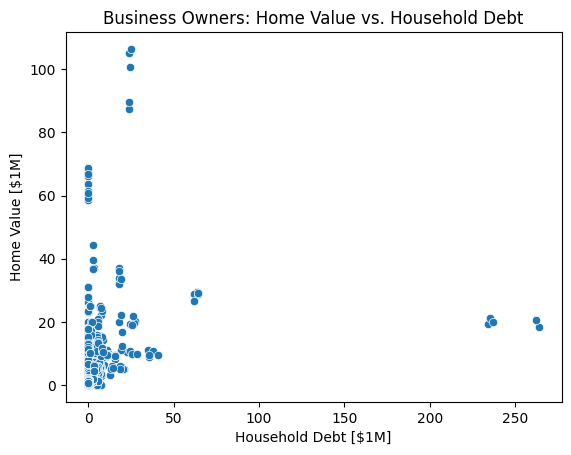

In [ ]:
# Plot "HOUSES" vs "DEBT"
sns.scatterplot(x= df["DEBT"] / 1e6, y=df["HOUSES"]/ 1e6)
plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Business Owners: Home Value vs. Household Debt");

## **1.3. Split**

In [ ]:
# Create the feature matrix X
X = df[["DEBT", "HOUSES"]]
print(X.shape)
X.head()

(7915, 2)


,DEBT,HOUSES
35,2800000.0,1470000.0
36,2800000.0,1430000.0
37,2800000.0,1290000.0
38,2800000.0,1040000.0
39,2800000.0,2010000.0


# **2. Build Model**

## **2.1. Iterate**

In [ ]:
# Build model
model = KMeans(n_clusters=3, random_state=42, n_init=10)
# Fit model to data
model.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [ ]:
# Extract the labels

labels = model.labels_
labels[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

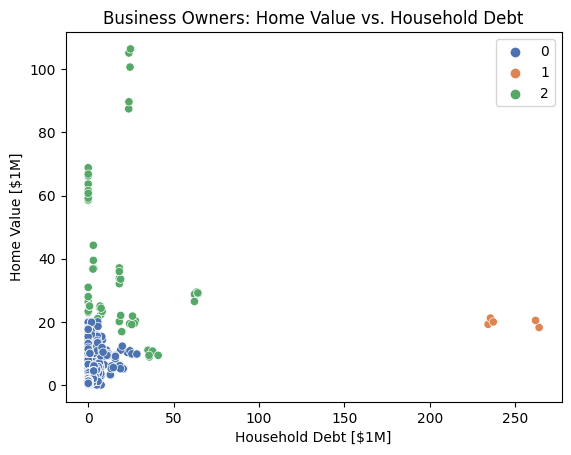

In [ ]:
# Plot "HOUSES" vs "DEBT" with hue=label
sns.scatterplot(
    x=df["DEBT"]/1e6,
    y=df["HOUSES"]/1e6,
    hue=labels,
    palette="deep"
    )
plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Business Owners: Home Value vs. Household Debt");

In [ ]:
# Extract the centroids

centroids = model.cluster_centers_
centroids

array([[5.31316767e+05, 1.69193560e+06],
       [2.46598000e+08, 1.98020000e+07],
       [1.48997000e+07, 3.69672308e+07]])

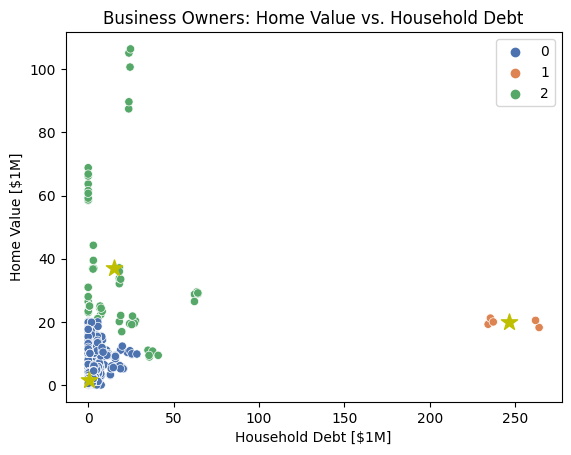

In [ ]:
# Plot "HOUSES" vs "DEBT", add centroids
sns.scatterplot(
    x=df["DEBT"]/1e6,
    y=df["HOUSES"]/1e6,
    hue=labels,
    palette="deep"
    )

plt.scatter(
    x=centroids[:,0]/1e6,
    y=centroids[:,1]/1e6,
    color="y",
    marker="*",
    s=150
    )

plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Business Owners: Home Value vs. Household Debt");

In [ ]:
# Extract the inertia

inertia = model.inertia_
print("Inertia (3 clusters):", inertia)

Inertia (3 clusters): 1.30388437637336e+17


In [ ]:
# Calculate the silhouette score

ss = silhouette_score(X, model.labels_)
print("Silhouette Score (3 clusters):", ss)

Silhouette Score (3 clusters): 0.9298661643844127


Outstanding! 0.929 is pretty close to 1, so our model has done a good job at identifying 3 clusters that are far away from each other.

In [ ]:
"""
   Use a for loop to build and train a K-Means model where n_clusters ranges from 2 to 12 (inclusive).
   Each time a model is trained, calculate the inertia and add it to the list inertia_errors, then calculate the silhouette score and add it to the list silhouette_scores.
"""

n_clusters = range(2,13)
inertia_errors = []
silhouette_scores = []

# Add `for` loop to train model and calculate inertia, silhouette score.
for k in n_clusters:
    #build model
    model = KMeans(n_clusters=k , random_state=42, n_init=10)
    #train model
    model.fit(X)
    #inertia
    inertia_errors.append(model.inertia_)
    #silhouette
    silhouette_scores.append(silhouette_score(X,model.labels_))

print("Inertia:", inertia_errors)
print()
print("Silhouette Scores:", silhouette_scores)

Inertia: [2.2391531525606048e+17, 1.30388437637336e+17, 8.134006878511744e+16, 5.606372826778043e+16, 4.295071635766387e+16, 3.5351233118440744e+16, 2.8115663121782224e+16, 2.213327773324295e+16, 1.8671053689526136e+16, 1.5897664367640528e+16, 1.3875305837655812e+16]

Silhouette Scores: [0.9867539349072182, 0.9298661643844127, 0.8094395388640403, 0.799493250494534, 0.6888353902492915, 0.6886147057789473, 0.6849214717552286, 0.6855252235182896, 0.6707274108759057, 0.60834920923331, 0.6215327969946134]


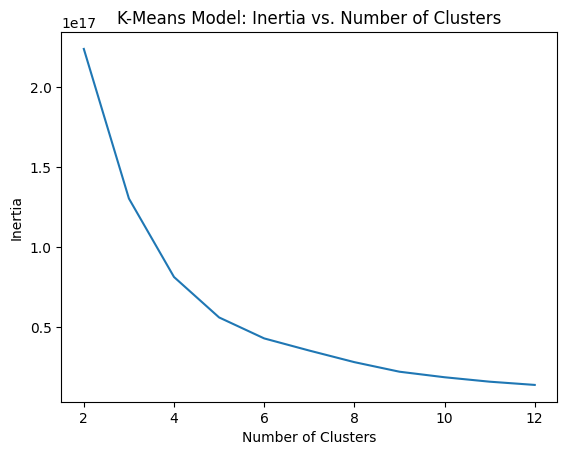

In [ ]:
# Plot `inertia_errors` by `n_clusters`
plt.plot(n_clusters, inertia_errors)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("K-Means Model: Inertia vs. Number of Clusters");

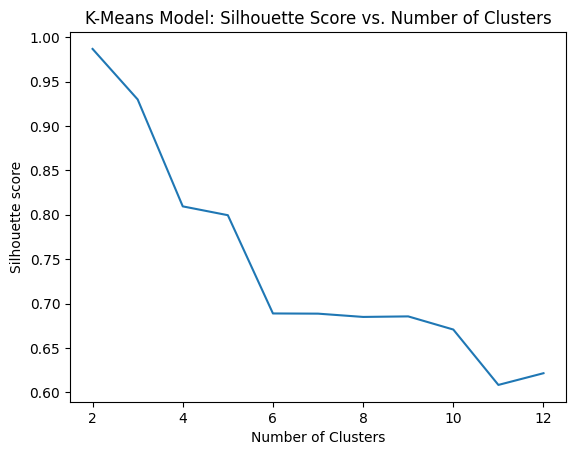

In [ ]:
# Plot `silhouette_scores` vs `n_clusters`
plt.plot(n_clusters, silhouette_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette score")
plt.title("K-Means Model: Silhouette Score vs. Number of Clusters");

In [ ]:
# Build model
final_model = KMeans(n_clusters=4, random_state=42, n_init=10)
# Fit model to data
final_model.fit(X)

KMeans(n_clusters=4, n_init=10, random_state=42)

# **3. Communicate**

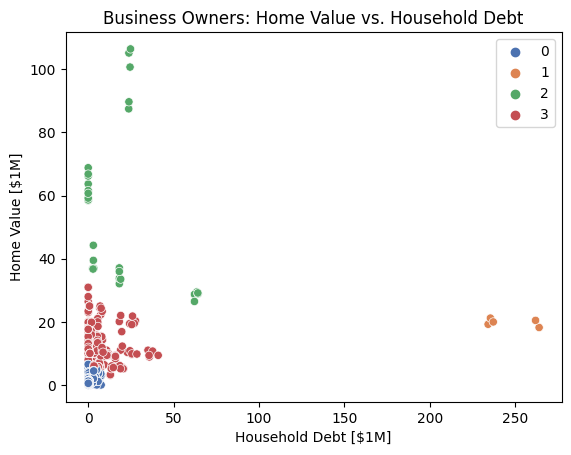

In [ ]:
# Plot "HOUSES" vs "DEBT" with final_model labels
sns.scatterplot(
    x=df["DEBT"]/ 1e6 ,
    y=df["HOUSES"]/ 1e6,
    hue= final_model.labels_,
    palette= "deep"
)
plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Business Owners: Home Value vs. Household Debt");

In [ ]:
xgb = X.groupby(final_model.labels_).mean()
xgb

,DEBT,HOUSES
0,3.749545e+05,1.143613e+06
1,2.465980e+08,1.980200e+07
2,1.813068e+07,5.432233e+07
3,3.555729e+06,1.091986e+07


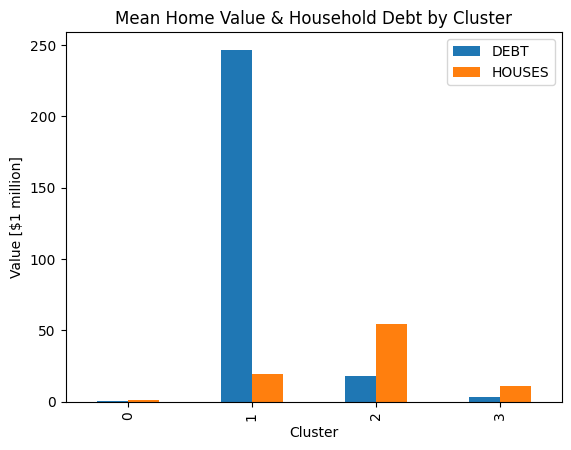

In [ ]:
# Create side-by-side bar chart of `xgb`
(xgb/1e6).plot(kind="bar")
plt.xlabel("Cluster")
plt.ylabel("Value [$1 million]")
plt.title("Mean Home Value & Household Debt by Cluster");